# 泊松分布

## 基本概念

如果事件以平均速率$\lambda$发生（泊松过程），那么**泊松分布**描述了单位时间内事件发生的次数
- **典型场景**：
    - 每小时接到的客服电话次数
    - 每平方米内细菌菌落数
    - 放射性物质单位时间内的衰变次数
- **参数**：发生率（强度）参数 λ>0（单位时间内平均事件次数）。

## 概率密度函数

对于一个随机变量$X \sim \text{Poisson}(\lambda)$，其概率质量函数为：
$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, ...$$
其中：
- $\lambda > 0$ 是单位时间内事件的平均发生次数
- $e \approx 2.71828$ 是自然对数的底数 
- $k$ 是观察到的事件数量

## 均值与方差

- **均值**：$\lambda$ 
- **方差**：$\lambda$

## 性质

- **可加性性质**：
    - 若$X_1 \sim \text{Poisson}(\lambda_1), X_2 \sim \text{Poisson}(\lambda_2)$，且独立，则$X_1 + X_2 \sim \text{Poisson}(\lambda_1 + \lambda_2)$

- **稀疏极限**：
    - 二项分布$\text{Bin}(n, p)$在$n \to \infty, p \to 0, np = \lambda$时逼近泊松分布： 
    $$\text{Bin}(n, p) \rightarrow \text{Poisson}(\lambda)$$
- **近似正态分布**：
    - 当$\lambda$较大（如$\lambda > 10$），泊松分布可用正态分布逼近

## 图形

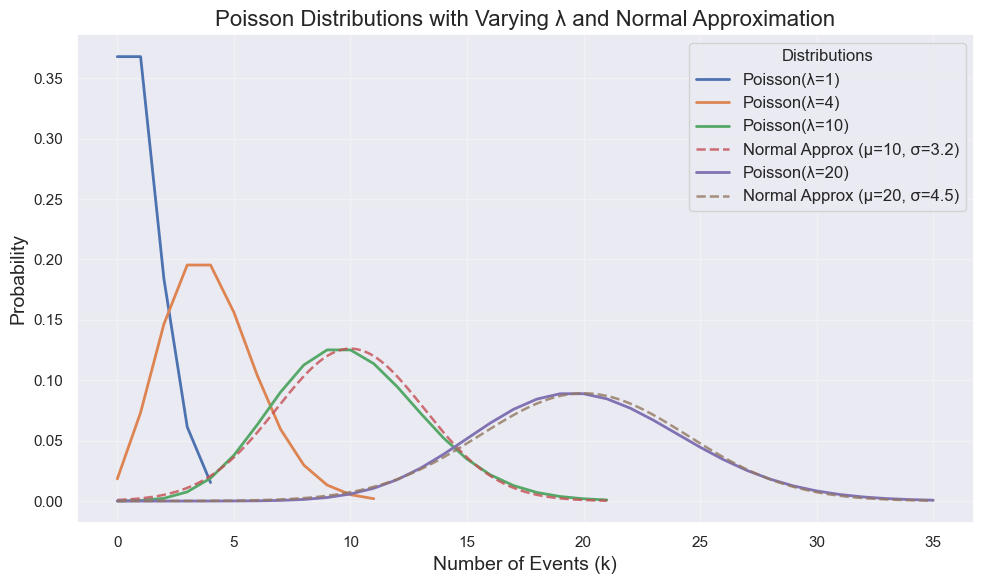

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm
import seaborn as sns
sns.set(style="darkgrid")

# 设置不同 λ（泊松分布的参数）
lambdas = [1, 4, 10, 20]

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制不同 λ 的泊松分布
for lam in lambdas:
    x = np.arange(0, lam + 4 * int(np.sqrt(lam)))
    pmf = poisson.pmf(x, lam)
    plt.plot(x, pmf, linestyle='-', linewidth=2,
             label=f'Poisson(λ={lam})')

    # 正态近似（仅对 λ ≥ 10）
    if lam >= 10:
        mu = lam
        sigma = np.sqrt(lam)
        x_norm = np.linspace(0, x[-1], 500)
        y_norm = norm.pdf(x_norm, mu, sigma)
        plt.plot(x_norm, y_norm, '--', alpha=0.8, linewidth=1.8,
                 label=f'Normal Approx (μ={mu}, σ={sigma:.1f})')

# 图形修饰
plt.title('Poisson Distributions with Varying λ and Normal Approximation', fontsize=16)
plt.xlabel('Number of Events (k)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend(title='Distributions', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 与其他分布的关系

| 分布关系     | 说明                                                                                |
| -------- | --------------------------------------------------------------------------------- |
| **二项分布** | $\text{Bin}(n, p) \xrightarrow[n \to \infty]{np=\lambda} \text{Poisson}(\lambda)$ |
| **指数分布** | 泊松过程中的两事件时间间隔服从指数分布                                                               |
| **正态分布** | 当 λ 很大时，泊松分布 ≈ 正态分布                                                               |